### National Basketball Association

#### 2016 - 2017 season

In [40]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,re
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns',200)
pd.set_option("display.max_rows",500)

In [41]:
dfNba = pd.read_csv("../../text_files/sbro/nba/nba_2016_sbro_massey_tr.txt")

In [42]:
dfNba.columns.tolist()

['date',
 'team1',
 'team1 encode',
 'team1 ha',
 'team1 ha encode',
 'team1 1st quarter',
 'team1 2nd quarter',
 'team1 3rd quarter',
 'team1 4th quarter',
 'team1 final score',
 'team1 game result',
 'team1 game result encode',
 'team1 open spread',
 'team1 open spread result',
 'team1 open spread result encode',
 'team1 close spread',
 'team1 close spread result',
 'team1 close spread result encode',
 'team1 american odds',
 'team1 probability odds',
 'team1 decimal odds',
 'team1 fractional odds',
 'team1 win',
 'team1 loss',
 'team1 record rating',
 'team1 rating rank',
 'team1 rating rating',
 'team1 power rank',
 'team1 power rating',
 'team1 offense rank',
 'team1 offense rating',
 'team1 defense rank',
 'team1 defense rating',
 'team1 home field advantage',
 'team1 schedule rank number',
 'team1 schedule rank decimal',
 'team1 conference',
 'team1 conference encode',
 'team1 assists',
 'team1 defensive rebounds',
 'team1 field goals attempted',
 'team1 fouls',
 'team1 offensiv

In [43]:
dfNba.head(50)

,date,team1,team1 encode,team1 ha,team1 ha encode,team1 1st quarter,team1 2nd quarter,team1 3rd quarter,team1 4th quarter,team1 final score,team1 game result,team1 game result encode,team1 open spread,team1 open spread result,team1 open spread result encode,team1 close spread,team1 close spread result,team1 close spread result encode,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2,team2 encode,team2 ha,team2 ha encode,team2 1st quarter,team2 2nd quarter,team2 3rd quarter,team2 4th quarter,team2 final score,team2 game result,team2 game result encode,team2 open spread,team2 open spread result,team2 open spread result encode,team2 close spread,team2 close spread result,team2 close spread result encode,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,open total result,open total result encode,close total,close total result,close total result encode,year
0,1025,New York Knicks,20,away,0,18,27,19,24,88,loss,0,9.5,loss,0,9.0,loss,0,355,21.98,4.55,3.5500,31,51,0.378,25,-0.91,25,-4.41,19,103.70,22,-2.52,2.77,26,0.42,atlantic,1,21.8,33.2,88.5,20.3,12.0,108.0,104.3,99.7,114,104.9,103.8,-3.7,-8.3,1,-1.6,-5.8,24.7,Cleveland Cavaliers,6,home,1,28,20,34,35,117,win,1,-9.5,win,1,-9.0,win,1,-450,81.82,1.22,0.2222,64,36,0.640,2,1.70,2,8.45,2,114.86,18,-0.82,2.71,5,1.52,central,2,22.6,34.1,84.6,18.2,9.3,107.4,111.4,123.3,120,113.4,109.4,4.0,2.3,-9,8.2,0.1,33.9,205.5,under,0,206.0,under,0,2016
1,1025,Utah Jazz,29,away,0,26,20,37,21,104,loss,0,6.0,loss,0,5.5,loss,0,195,33.90,2.95,1.9500,55,38,0.591,5,0.78,6,3.74,29,100.01,1,9.32,2.24,1,1.90,northwest,3,20.1,33.7,79.3,19.1,9.1,97.5,100.4,96.7,95,100.8,100.0,2.9,-16.0,-26,4.8,1.1,25.9,Portland Trailblazers,25,home,1,26,28,23,36,113,win,1,-6.0,win,1,-5.5,win,1,-235,70.15,1.43,0.4255,41,45,0.477,14,-0.07,14,0.19,8,106.97,20,-1.19,3.03,4,1.55,northwest,3,20.9,33.6,86.2,21.2,10.1,109.0,107.6,99.0,103,109.8,105.4,-1.3,-20.0,-25,2.2,-4.9,28.0,194.0,over,1,192.0,over,1,2016
2,1025,San Antonio Spurs,27,away,0,31,33,33,32,129,win,1,8.0,win,1,8.0,win,1,325,23.53,4.25,3.2500,69,29,0.704,3,1.23,3,6.50,10,106.69,2,5.41,2.85,2,1.74,southwest,6,23.4,33.5,84.2,18.3,10.5,99.4,105.6,107.7,115,106.3,105.0,6.2,-20.7,-14,7.5,4.9,23.7,Golden State Warriors,10,home,1,20,26,31,23,100,loss,0,-8.0,loss,0,-8.0,loss,0,-400,80.00,1.25,0.2500,83,16,0.838,1,3.54,1,15.71,1,119.68,11,1.62,2.99,3,1.58,pacific,4,30.0,35.3,87.1,19.7,9.4,104.5,116.5,121.0,129,118.9,114.0,12.0,-2.3,9,16.1,7.7,31.5,210.5,over,1,212.0,over,1,2016
3,1026,Miami Heat,16,away,0,23,27,30,28,108,win,1,4.0,win,1,3.0,w

### Parsing dates

In [44]:
def parseDate(df):
    for index,x in enumerate(df["date"]):
        if (int(x) > 900 and int(x) <= 1231 and len(str(x)) == 4):
            month = str(x)[:2]
            day = str(x)[2:]
            df["date"].iloc[index] = month + "/" + day + "/" + "2016"
            print("changed: %s" % df["date"].iloc[index])
        # following year from January to June
        elif (int(x) < 900):
            month = str(x)[:1]
            day = str(x)[1:]
            
            df["date"].iloc[index] = month + "/" + day + "/" + "2017"
            
    # return df

In [45]:
parseDate(dfNba).tail(50)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


changed: 10/25/2016
changed: 10/25/2016
changed: 10/25/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016


AttributeError: 'NoneType' object has no attribute 'tail'

In [46]:
dfNba.tail(50)

,date,team1,team1 encode,team1 ha,team1 ha encode,team1 1st quarter,team1 2nd quarter,team1 3rd quarter,team1 4th quarter,team1 final score,team1 game result,team1 game result encode,team1 open spread,team1 open spread result,team1 open spread result encode,team1 close spread,team1 close spread result,team1 close spread result encode,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2,team2 encode,team2 ha,team2 ha encode,team2 1st quarter,team2 2nd quarter,team2 3rd quarter,team2 4th quarter,team2 final score,team2 game result,team2 game result encode,team2 open spread,team2 open spread result,team2 open spread result encode,team2 close spread,team2 close spread result,team2 close spread result encode,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,open total result,open total result encode,close total,close total result,close total result encode,year
1258,4/23/2017,Los Angeles Clippers,13,away,0,26,26,28,18,98,loss,0,1.0,loss,0,5.0,loss,0,185,35.09,2.85,1.8500,54,35,0.607,6,0.64,5,3.82,6,108.32,12,1.10,2.37,8,1.30,pacific,4,22.2,33.7,82.7,19.9,8.9,103.9,107.8,93.7,91,108.3,107.3,3.9,-4.0,-13,7.8,-0.2,27.1,Utah Jazz,29,home,1,24,31,22,28,105,win,1,-1.0,win,1,-5.0,win,1,-215,68.25,1.47,0.4651,55,38,0.591,5,0.78,6,3.74,29,100.01,1,9.32,2.24,1,1.90,northwest,3,20.1,33.7,79.3,19.1,9.1,97.5,100.4,96.7,95,100.8,100.0,2.9,-16.0,-26,4.8,1.1,25.9,198.0,over,1,196.0,over,1,2016
1259,4/24/2017,Milwaukee Bucks,17,away,0,20,28,25,20,93,loss,0,6.5,loss,0,6.0,loss,0,200,33.33,3.00,2.0000,44,44,0.500,16,-0.17,16,-0.70,28,100.77,5,4.12,2.73,21,0.53,central,2,24.0,31.5,81.6,20.3,8.8,103.1,102.9,86.0,89,104.9,100.9,-0.2,-13.0,-3,2.6,-3.1,23.6,Toronto Raptors,28,home,1,31,26,33,28,118,win,1,-6.5,win,1,-6.0,win,1,-240,70.59,1.42,0.4167,55,37,0.598,9,0.35,10,0.85,21,102.89,6,3.55,2.69,19,0.69,atlantic,1,18.6,32.6,83.8,20.8,10.2,102.6,105.8,99.7,102,109.8,101.7,3.1,-16.7,-7,6.6,-0.4,24.2,192.5,over,1,193.0,over,1,2016
1260,4/24/2017,Washington Wizards,30,away,0,35,15,27,24,101,loss,0,3.0,loss,0,2.5,loss,0,120,45.45,2.20,1.2000,56,39,0.589,8,0.47,12,0.68,5,109.45,25,-3.18,3.61,30,0.24,southeast,5,23.7,32.5,87.1,21.5,10.4,107.5,109.0,99.3,105,110.3,107.8,1.6,-10.3,-10,5.7,-2.5,25.0,Atlanta Hawks,1,home,1,28,31,18,34,111,win,1,-3.0,win,1,-2.5,win,1,-140,58.33,1.71,0.7143,45,43,0.511,17,-0.25,18,-1.07,22,102.65,10,1.87,3.19,29,0.31,southeast,5,23.5,34.0,84.4,18.4,10.4,104.2,103.3,103.0,99,106.1,100.5,-0.9,-3.3,-16,0.4,-2.1,26.1,211.5,over,1,213.0,under,0,2016
1261,4/24/2017,Golden State Warriors,10,away,0,45,2

### Change to date time index

In [48]:
dfNba["date"] = pd.to_datetime(dfNba["date"],format="%m/%d/%Y")
# dfNba["date"] = dfNba["date"].apply(pd.to_datetime(format="%m/%d/%Y"))
# dfNba.set_index("date",inplace=True)
# dfNba.dtypes
dfNba.head(15)

,date,team1,team1 encode,team1 ha,team1 ha encode,team1 1st quarter,team1 2nd quarter,team1 3rd quarter,team1 4th quarter,team1 final score,team1 game result,team1 game result encode,team1 open spread,team1 open spread result,team1 open spread result encode,team1 close spread,team1 close spread result,team1 close spread result encode,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2,team2 encode,team2 ha,team2 ha encode,team2 1st quarter,team2 2nd quarter,team2 3rd quarter,team2 4th quarter,team2 final score,team2 game result,team2 game result encode,team2 open spread,team2 open spread result,team2 open spread result encode,team2 close spread,team2 close spread result,team2 close spread result encode,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,open total result,open total result encode,close total,close total result,close total result encode,year
0,2016-10-25,New York Knicks,20,away,0,18,27,19,24,88,loss,0,9.5,loss,0,9.0,loss,0,355,21.98,4.55,3.5500,31,51,0.378,25,-0.91,25,-4.41,19,103.70,22,-2.52,2.77,26,0.42,atlantic,1,21.8,33.2,88.5,20.3,12.0,108.0,104.3,99.7,114,104.9,103.8,-3.7,-8.3,1,-1.6,-5.8,24.7,Cleveland Cavaliers,6,home,1,28,20,34,35,117,win,1,-9.5,win,1,-9.0,win,1,-450,81.82,1.22,0.2222,64,36,0.640,2,1.70,2,8.45,2,114.86,18,-0.82,2.71,5,1.52,central,2,22.6,34.1,84.6,18.2,9.3,107.4,111.4,123.3,120,113.4,109.4,4.0,2.3,-9,8.2,0.1,33.9,205.5,under,0,206.0,under,0,2016
1,2016-10-25,Utah Jazz,29,away,0,26,20,37,21,104,loss,0,6.0,loss,0,5.5,loss,0,195,33.90,2.95,1.9500,55,38,0.591,5,0.78,6,3.74,29,100.01,1,9.32,2.24,1,1.90,northwest,3,20.1,33.7,79.3,19.1,9.1,97.5,100.4,96.7,95,100.8,100.0,2.9,-16.0,-26,4.8,1.1,25.9,Portland Trailblazers,25,home,1,26,28,23,36,113,win,1,-6.0,win,1,-5.5,win,1,-235,70.15,1.43,0.4255,41,45,0.477,14,-0.07,14,0.19,8,106.97,20,-1.19,3.03,4,1.55,northwest,3,20.9,33.6,86.2,21.2,10.1,109.0,107.6,99.0,103,109.8,105.4,-1.3,-20.0,-25,2.2,-4.9,28.0,194.0,over,1,192.0,over,1,2016
2,2016-10-25,San Antonio Spurs,27,away,0,31,33,33,32,129,win,1,8.0,win,1,8.0,win,1,325,23.53,4.25,3.2500,69,29,0.704,3,1.23,3,6.50,10,106.69,2,5.41,2.85,2,1.74,southwest,6,23.4,33.5,84.2,18.3,10.5,99.4,105.6,107.7,115,106.3,105.0,6.2,-20.7,-14,7.5,4.9,23.7,Golden State Warriors,10,home,1,20,26,31,23,100,loss,0,-8.0,loss,0,-8.0,loss,0,-400,80.00,1.25,0.2500,83,16,0.838,1,3.54,1,15.71,1,119.68,11,1.62,2.99,3,1.58,pacific,4,30.0,35.3,87.1,19.7,9.4,104.5,116.5,121.0,129,118.9,114.0,12.0,-2.3,9,16.1,7.7,31.5,210.5,over,1,212.0,over,1,2016
3,2016-10-26,Miami Heat,16,away,0,23,27,30,28,1

### Restrict target

In [49]:
dfFilterNba = dfNba[(dfNba["team1 final score"] > 60) & (dfNba["team2 final score"] > 60)]

In [50]:
# dallasDf["Date"] = pd.to_datetime(dallasDf['Date'])
# dallasDf.set_index('Date',inplace=True)
# dallasDf.index

In [51]:
features = [
    # 'date',
    # 'team1',
    'team1 encode',
    # 'team1 ha',
    'team1 ha encode',
    # 'team1 1st quarter',
    # 'team1 2nd quarter',
    # 'team1 3rd quarter',
    # 'team1 4th quarter',
    # 'team1 final score',
    # 'team1 game result',
    # 'team1 game result encode',
    'team1 open spread',
    # 'team1 open spread result',
    # 'team1 open spread result encode',
    'team1 close spread',
    # 'team1 close spread result',
    # 'team1 close spread result encode',
    'team1 american odds',
    'team1 probability odds',
    'team1 decimal odds',
    'team1 fractional odds',
    'team1 win',
    'team1 loss',
    'team1 record rating',
    'team1 rating rank',
    'team1 rating rating',
    'team1 power rank',
    'team1 power rating',
    'team1 offense rank',
    'team1 offense rating',
    'team1 defense rank',
    'team1 defense rating',
    'team1 home field advantage',
    'team1 schedule rank number',
    'team1 schedule rank decimal',
    # 'team1 conference',
    'team1 conference encode',
    'team1 assists',
    'team1 defensive rebounds',
    'team1 field goals attempted',
    'team1 fouls',
    'team1 offensive rebounds',
    'team1 opponent points',
    'team1 points',
    'team1 last 3 points',
    'team1 last 1 points',
    'team1 home points',
    'team1 away points',
    'team1 scoring margin',
    'team1 last 3 scoring margin',
    'team1 last 1 scoring margin',
    'team1 home scoring margin',
    'team1 away scoring margin',
    'team1 three pointers attempted',
    # 'team2',
    'team2 encode',
    # 'team2 ha',
    'team2 ha encode',
    # 'team2 1st quarter',
    # 'team2 2nd quarter',
    # 'team2 3rd quarter',
    # 'team2 4th quarter',
    # 'team2 final score',
    # 'team2 game result',
    # 'team2 game result encode',
    'team2 open spread',
    # 'team2 open spread result',
    # 'team2 open spread result encode',
    'team2 close spread',
    # 'team2 close spread result',
    # 'team2 close spread result encode',
    'team2 american odds',
    'team2 probability odds',
    'team2 decimal odds',
    'team2 fractional odds',
    'team2 win',
    'team2 loss',
    'team2 record rating',
    'team2 rating rank',
    'team2 rating rating',
    'team2 power rank',
    'team2 power rating',
    'team2 offense rank',
    'team2 offense rating',
    'team2 defense rank',
    'team2 defense rating',
    'team2 home field advantage',
    'team2 schedule rank number',
    'team2 schedule rank decimal',
    # 'team2 conference',
    'team2 conference encode',
    'team2 assists',
    'team2 defensive rebounds',
    'team2 field goals attempted',
    'team2 fouls',
    'team2 offensive rebounds',
    'team2 opponent points',
    'team2 points',
    'team2 last 3 points',
    'team2 last 1 points',
    'team2 home points',
    'team2 away points',
    'team2 scoring margin',
    'team2 last 3 scoring margin',
    'team2 last 1 scoring margin',
    'team2 home scoring margin',
    'team2 away scoring margin',
    'team2 three pointers attempted',
    'open total',
    # 'open total result',
    # 'open total result encode',
    'close total']
    # 'close total result',
    # 'close total result encode',
    # 'year'

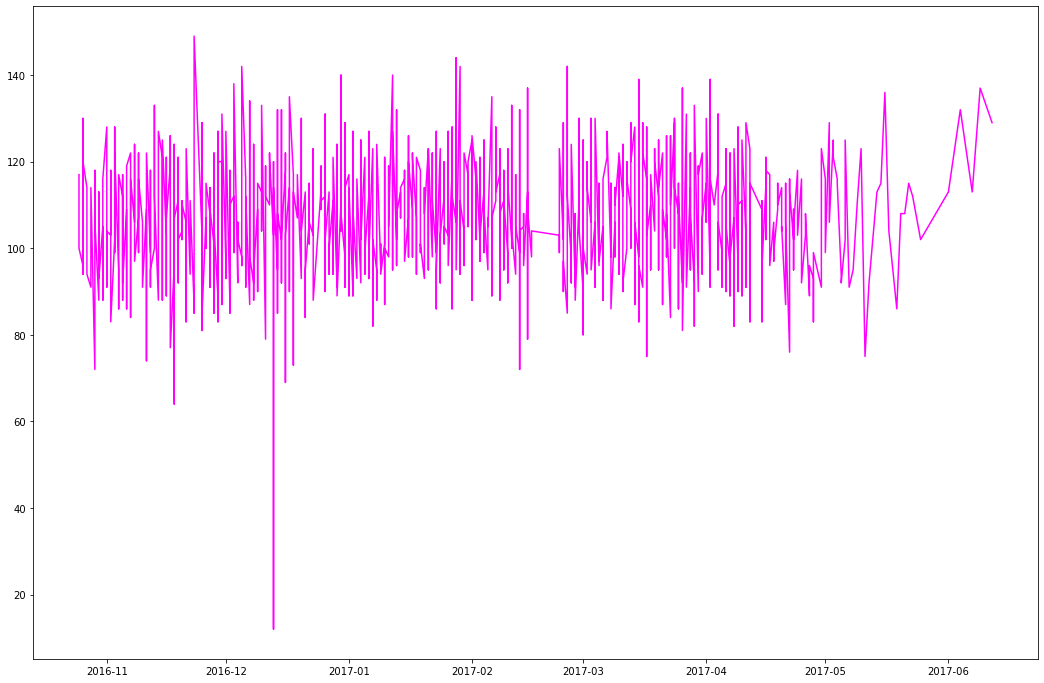

In [53]:
plt.figure(figsize=(18,12))
# plt.plot(nbaDf.index,nbaDf["team1 final score"],color="green")
plt.plot(dfNba.date,dfNba["team2 final score"],color="magenta")
plt.show()

In [55]:
dfNbaScore = dfNba[(dfNba["team1 final score"] > 60) \
    & (dfNba["team2 final score"] > 60)]

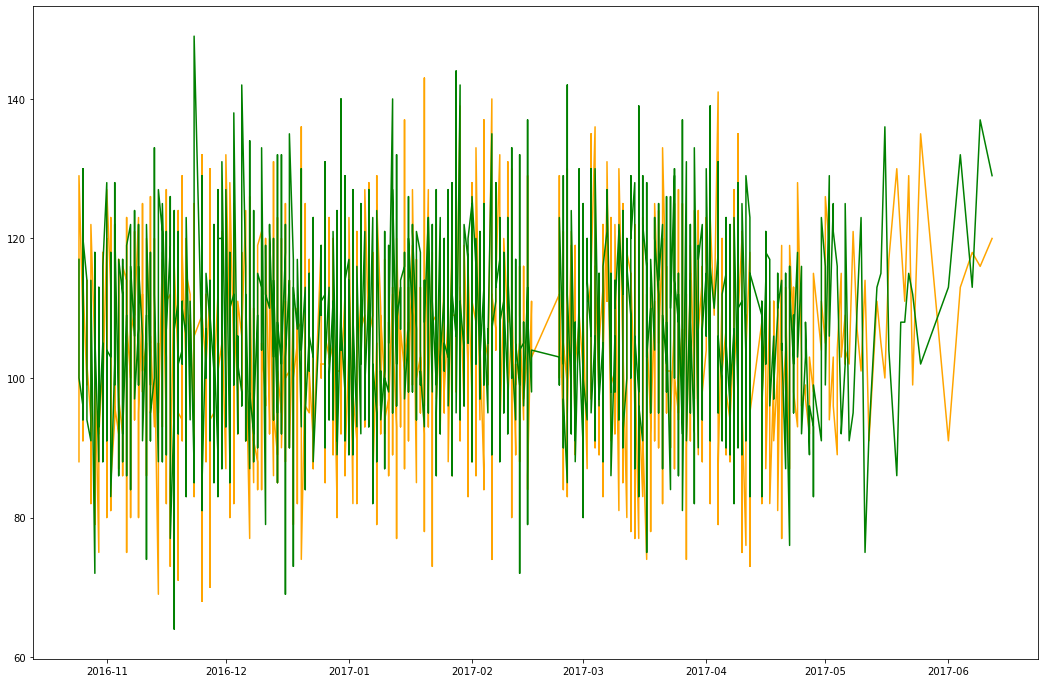

In [56]:
plt.figure(figsize=(18,12))
plt.plot(dfNbaScore.date,dfNbaScore["team1 final score"],color="orange")
plt.plot(dfNbaScore.date,dfNbaScore["team2 final score"],color="green")
plt.show()

### Train, test, & split

#### Target team one game score

In [24]:
xTrain,xTest,yTrain,yTest = train_test_split(dfFilterNba[features],dfFilterNba["team1 final score"], \
    test_size=0.25,random_state=14)

xTestCopy = xTest.copy(deep=True)

In [36]:
# scale data
scalerX = StandardScaler()
scalerX.fit(xTrain)
xTrainScaled = scalerX.transform(xTrain)
xTestScaled = scalerX.transform(xTest)

In [37]:
XGBRegressor = xgb.XGBRegressor(booster="gbtree",objective="reg:squarederror",learning_rate=0.9111,
    max_depth=6,alpha=1,n_estimators=211,reg_lambda=0.09999,reg_alpha=2.2222)

In [38]:
XGBRegressor.fit(xTrainScaled,yTrain)

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.9111, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=211, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=2.2222, reg_lambda=0.09999, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [39]:
yPredict = XGBRegressor.predict(xTestScaled)
pd.DataFrame(yPredict).head(255)

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


,0
0,113.069740
1,91.225121
2,101.521202
3,107.979721
4,78.451828
5,103.922203
6,91.464653
7,99.986671
8,111.473396
9,103.162285


In [40]:
xTestCopy.reset_index(inplace=True)
xTestCopy.head(25)

,index,team1 encode,team1 ha encode,team1 open spread,team1 close spread,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2 encode,team2 ha encode,team2 open spread,team2 close spread,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,close total
0,876,15,0,1.0,2.0,110,47.62,2.10,1.1000,45,43,0.511,13,0.07,15,-0.11,26,101.03,4,4.45,3.08,6,1.47,6,21.1,31.7,83.1,22.4,10.6,100.3,100.2,103.0,96,99.5,100.8,-0.1,-6.0,-7,2.1,-2.3,26.3,8,1,-1.0,-2.0,-130,56.52,1.77,0.7692,40,42,0.488,11,0.15,9,1.39,4,112.65,28,-5.66,2.81,16,0.84,3,25.3,34.6,87.7,19.1,11.8,111.2,111.7,108.3,111,113.2,110.3,0.5,7.7,6,2.5,-1.4,28.8,215.0,216.5
1,603,22,0,10.5,11.5,550,15.38,6.50,5.5000,29,53,0.354,26,-1.05,29,-6.01,24,102.55,24,-2.97,2.79,27,0.37,5,22.2,33.3,87.0,19.3,9.8,107.6,101.1,100.0,113,100.2,101.9,-6.6,-19.3,4,-3.6,-9.6,26.1,29,1,-10.5,-11.5,-800,88.89,1.12,0.1250,55,38,0.591,5,0.78,6,3.74,29,100.01,1,9.32,2.24,1,1.90,3,20.1,33.7,79.3,19.1,9.1,97.5,100.4,96.7,95,100.8,100.0,2.9,-16.0,-26,4.8,1.1,25.9,194.0,194.5
2,446,16,0,4.5,4.5,165,37.74,2.65,1.6500,41,41,0.500,10,0.25,8,1.53,18,103.88,7,3.24,2.85,25,0.42,5,21.2,33.0,85.8,20.5,10.6,102.1,103.2,113.3,110,106.5,99.9,1.1,4.7,8,4.0,-1.8,27.0,19,1,-4.5,-4.5,-185,64.91,1.54,0.5405,34,48,0.415,19,-0.36,20,-1.52,16,104.77,17,-0.70,2.95,12,0.96,6,22.8,35.1,87.0,18.2,8.6,106.4,104.3,100.0,103,107.6,101.0,-2.1,-10.3,3,0.6,-4.8,26.8,203.0,206.0
3,726,21,0,8.5,9.5,425,19.05,5.25,4.2500,48,39,0.552,12,0.11,13,0.32,14,105.48,15,0.43,3.19,9,1.27,3,20.9,34.2,87.4,21.0,12.2,106.2,106.5,107.7,99,109.7,103.3,0.2,-2.7,-6,5.6,-5.1,25.9,27,1,-8.5,-9.5,-550,84.62,1.18,0.1818,69,29,0.704,3,1.23,3,6.50,10,106.69,2,5.41,2.85,2,1.74,6,23.4,33.5,84.2,18.3,10.5,99.4,105.6,107.7,115,106.3,105.0,6.2,-20.7,-14,7.5,4.9,23.7,210.0,210.0
4,551,19,0,7.0,6.0,220,31.25,3.20,2.2000,34,48,0.415,19,-0.36,20,-1.52,16,104.77,17,-0.70,2.95,12,0.96,6,22.8,35.1,87.0,18.2,8.6,106.4,104.3,100.0,103,107.6,101.0,-2.1,-10.3,3,0.6,-4.8,26.8,2,1,-7.0,-6.0,-260,72.22,1.38,0.3846,62,38,0.620,7,0.61,7,1.89,9,106.81,13,0.67,2.33,15,0.88,1,25.5,32.1,84.9,20.6,9.1,105.9,107.5,104.0,102,109.4,105.6,1.6,-14.3,-33,2.4,0.8,33.6,214.5,212.5
5,280,22,0,-1.0,0.0,-110,52.38,1.91,0.9091,29,53,0.354,26,-1.05,29,-6.01,24,102.55,24,-2.97,2.79,27,0.37,5,22.2,33.3,87.0,19.3,9.8,107.6,101.1,100.0,113,100.2,101.9,-6.6,-19.3,4,-3.6,-9.6,26.1,23,1,1.0,0.0,-110,52.38,1.91,0.9091,28,54,0.341,27,-1.05,27,-5.85,20,103.33,26,-3.59,2.71,28,0.36,1,23.8,33.0,85.3,21.9,9.8,108.1,102.4,102.0,113,102.4,102.5,-5.7,-6.0,-1,-3.6,-7.8,29.8,196.0,198.5
6,168,20,0,3.0,5.0,175,36.

In [41]:
xTestCopy["team1 final score predict"] = ""
for index,row in enumerate(range(0,len(xTestCopy),1)):
    # print(index)
    xTestCopy["team1 final score predict"].iloc[index] = pd.DataFrame(yPredict).iloc[index,0]
    


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [42]:
xTestCopy.tail(50)

,index,team1 encode,team1 ha encode,team1 open spread,team1 close spread,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2 encode,team2 ha encode,team2 open spread,team2 close spread,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,close total,team1 final score predict
277,625,25,0,5.5,5.5,200,33.33,3.00,2.0000,41,45,0.477,14,-0.07,14,0.19,8,106.97,20,-1.19,3.03,4,1.55,3,20.9,33.6,86.2,21.2,10.1,109.0,107.6,99.0,103,109.8,105.4,-1.3,-20.0,-25,2.2,-4.9,28.0,4,1,-5.5,-5.5,-240,70.59,1.42,0.4167,36,46,0.439,21,-0.45,17,-1.06,17,104.34,16,0.20,2.87,22,0.48,5,23.1,34.8,85.4,16.6,8.8,104.7,104.9,89.7,76,106.6,103.2,0.2,-14.7,-27,3.2,-2.8,28.6,216.5,217.5,87.565811
278,1193,19,0,13.0,17.0,1600,5.88,17.00,16.0000,34,48,0.415,19,-0.36,20,-1.52,16,104.77,17,-0.70,2.95,12,0.96,6,22.8,35.1,87.0,18.2,8.6,106.4,104.3,100.0,103,107.6,101.0,-2.1,-10.3,3,0.6,-4.8,26.8,10,1,-13.0,-17.0,-6000,98.36,1.02,0.0167,83,16,0.838,1,3.54,1,15.71,1,119.68,11,1.62,2.99,3,1.58,4,30.0,35.3,87.1,19.7,9.4,104.5,116.5,121.0,129,118.9,114.0,12.0,-2.3,9,16.1,7.7,31.5,219.0,216.0,104.730347
279,80,6,0,-13.0,-12.0,-1000,90.91,1.10,0.1000,64,36,0.640,2,1.70,2,8.45,2,114.86,18,-0.82,2.71,5,1.52,2,22.6,34.1,84.6,18.2,9.3,107.4,111.4,123.3,120,113.4,109.4,4.0,2.3,-9,8.2,0.1,33.9,23,1,13.0,12.0,700,12.50,8.00,7.0000,28,54,0.341,27,-1.05,27,-5.85,20,103.33,26,-3.59,2.71,28,0.36,1,23.8,33.0,85.3,21.9,9.8,108.1,102.4,102.0,113,102.4,102.5,-5.7,-6.0,-1,-3.6,-7.8,29.8,204.5,210.0,104.647285
280,35,10,0,-12.0,-11.5,-791,88.78,1.13,0.1264,83,16,0.838,1,3.54,1,15.71,1,119.68,11,1.62,2.99,3,1.58,4,30.0,35.3,87.1,19.7,9.4,104.5,116.5,121.0,129,118.9,114.0,12.0,-2.3,9,16.1,7.7,31.5,24,1,12.0,11.5,570,14.93,6.70,5.7000,24,58,0.293,29,-1.34,28,-6.01,7,107.98,30,-8.40,2.98,13,0.96,4,19.6,33.1,88.5,24.8,11.9,113.3,107.7,116.0,104,109.8,105.8,-5.6,3.0,-25,-2.3,-8.7,22.6,225.0,227.0,115.290405
281,176,3,0,9.0,9.5,400,20.00,5.00,4.0000,20,62,0.244,30,-1.55,30,-6.55,11,106.00,29,-6.95,2.66,23,0.43,1,21.4,35.1,85.2,21.0,8.8,112.5,105.8,95.0,73,104.4,107.1,-6.7,-15.7,-39,-5.5,-7.9,31.6,21,1,-9.0,-9.5,-500,83.33,1.20,0.2000,48,39,0.552,12,0.11,13,0.32,14,105.48,15,0.43,3.19,9,1.27,3,20.9,34.2,87.4,21.0,12.2,106.2,106.5,107.7,99,109.7,103.3,0.2,-2.7,-6,5.6,-5.1,25.9,218.0,216.5,109.722054
282,29,3,0,6.5,8.0,280,26.32,3.80,2.8000,20,62,0.244,30,-1.55,30,-6.55,11,106.00,29,-6.95,2.66,23,0.43,1,21.4,35.1,85.2,21.0,8.8,112.5,105.8,95.0,73,104.4,107.1,-6.7,-15.7,-39,-5.5,-7.9,31.6,17,1,-6.5,-8.0,-360,78.26,1.28,0.2778,44,44,0.500,16,-0.17,16,-0.70,28,100.77,5,4.12,2.73,21,0.53,2,24.0,31.

In [43]:
dfPredict = pd.DataFrame(columns=["yTest","yPredict"])

In [44]:
dfPredict["yTest"] = yTest
dfPredict["yPredict"] = yPredict
dfPredict.head(100)

,yTest,yPredict
876,105,113.069740
603,107,91.225121
446,87,101.521202
726,94,107.979721
551,108,78.451828
280,105,103.922203
168,112,91.464653
1219,86,99.986671
1176,98,111.473396
273,109,103.162285


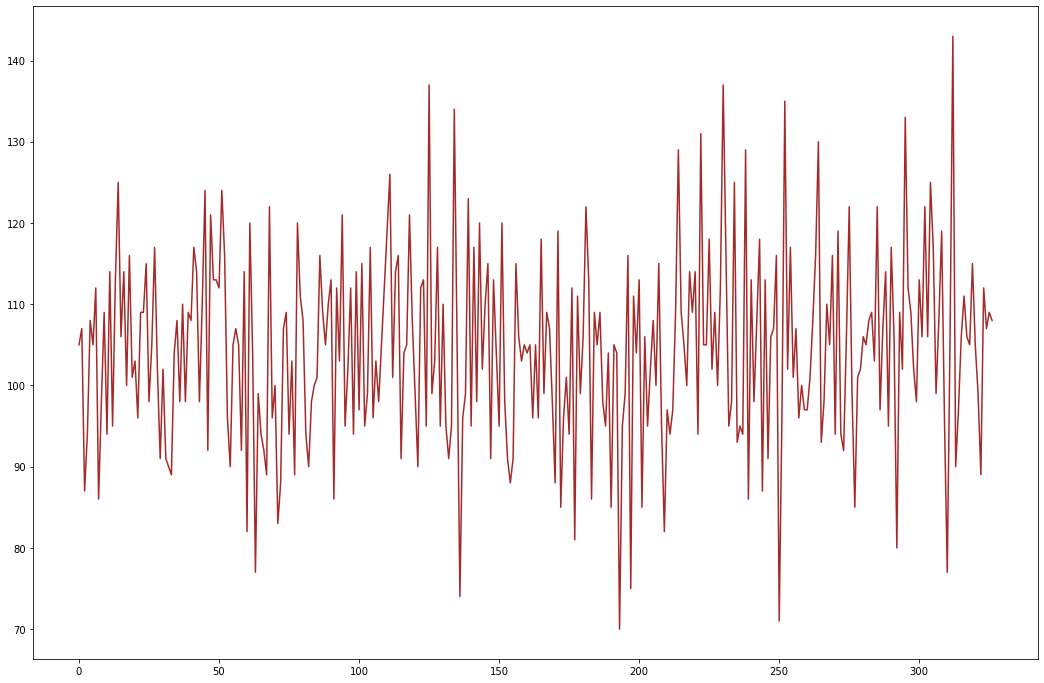

In [45]:
yTestReset = pd.DataFrame(yTest).reset_index(inplace=False,drop=True)

plt.figure(figsize=(18,12))
plt.plot(yTestReset.index,yTestReset,color="brown")
plt.show()

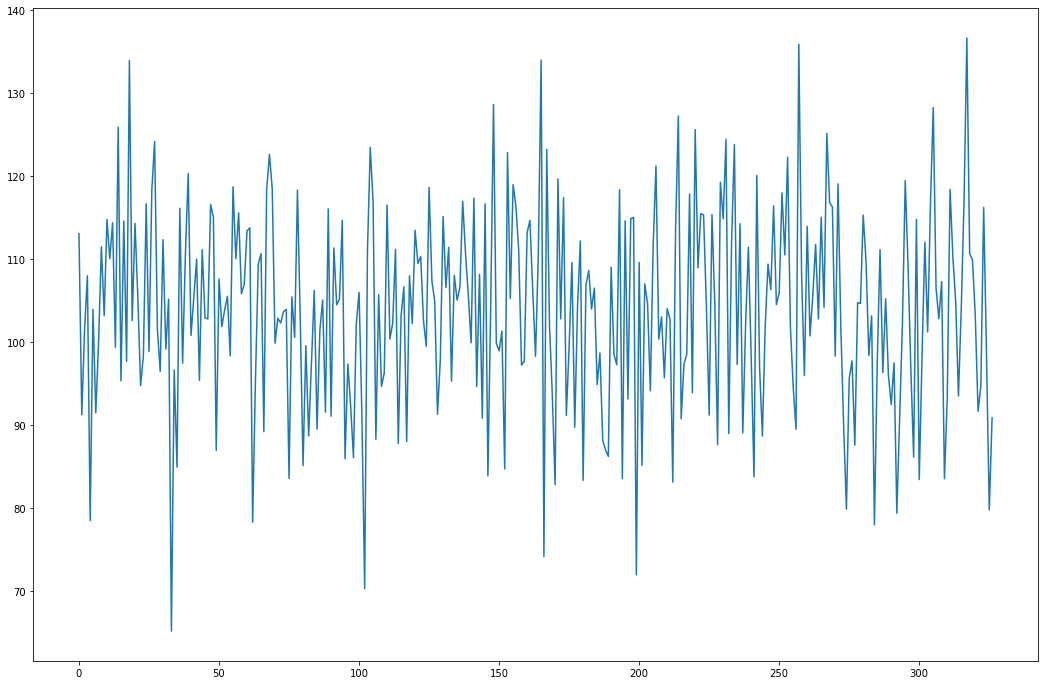

In [46]:
yPredictReset = pd.DataFrame(yPredict).reset_index(inplace=False,drop=True)

plt.figure(figsize=(18,12))
plt.plot(yPredictReset.index,yPredictReset[0])
plt.show()

### Superimpose

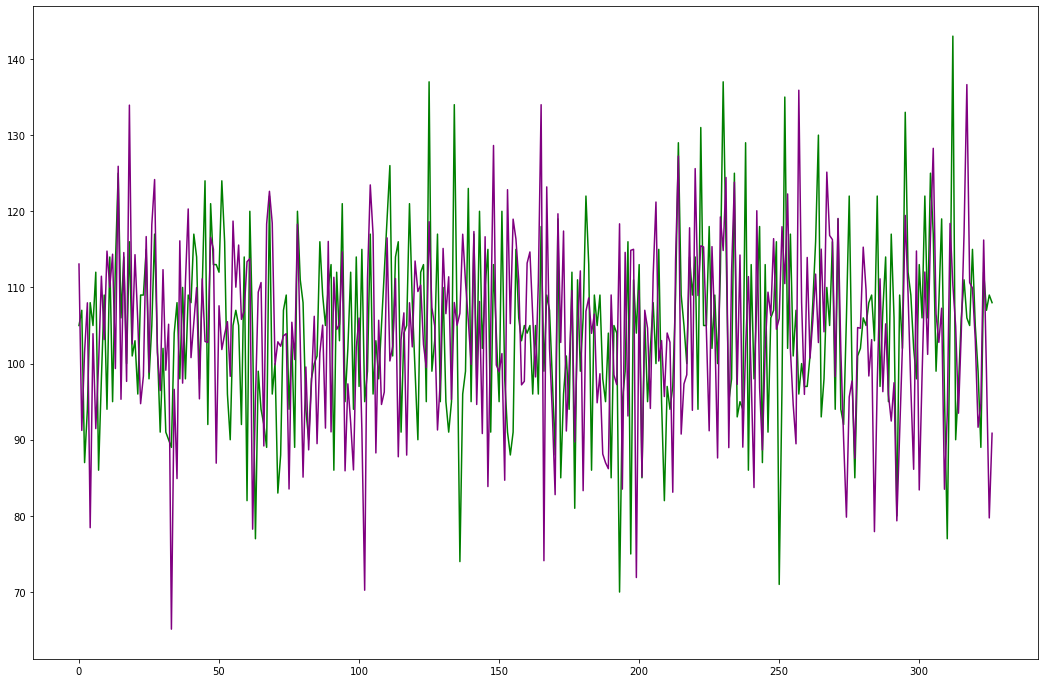

In [47]:
plt.figure(figsize=(18,12))
plt.plot(yTestReset.index,yTestReset["team1 final score"],color="green")
plt.plot(yPredictReset.index,yPredictReset[0],color="purple")
plt.show()

### Percentage off

In [48]:
convNumpyYTestReset = np.array(yTestReset)
percentOff = ((convNumpyYTestReset - yPredictReset) / (convNumpyYTestReset + 0.0001)) * 100

pd.DataFrame(percentOff).sample(55)

,0
175,-5.824476
282,8.915208
287,9.989770
0,-7.685460
47,3.657794
120,-14.613721
291,8.033745
248,-8.790167
137,-21.862095
3,-14.872028


In [49]:
meanAbsoluteError = mean_absolute_error(yTest,yPredict)
print("mean absolute error (team1 final score): %s" % meanAbsoluteError)
meanSquaredError = mean_squared_error(yTest,yPredict)
print("mean squared error (team1 final score): %s" % meanSquaredError)

mean absolute error (team1 final score): 11.648719507619875
mean squared error (team1 final score): 211.10418270213765


### Convert to dmatrix data structure

In [50]:
dataDMatrix = xgb.DMatrix(data=dfFilterNba[features],label=dfFilterNba["team1 final score"])
dataDMatrix

In [51]:
params = {"booster": "gbtree","objective":"reg:squarederror","learning_rate": 0.9111,
    'max_depth': 6,"alpha": 1,"n_estimators": 211,"reg_lambda": 0.09999,"reg_alpha": 2.2222}

In [52]:
crossValResults = xgb.cv(dtrain=dataDMatrix,params=params,nfold=12,
    num_boost_round=25,early_stopping_rounds=10,metrics="rmse",as_pandas=True,seed=122)
crossValResults.head()

[09:53:52] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:53:52] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:53:52] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,14.185637,0.062721,14.687560,0.420563
1,9.601524,0.142589,12.090464,0.707633


In [53]:
dtrain = xgb.DMatrix(xTrain[features],label=yTrain)
dtest = xgb.DMatrix(xTest[features],label=yTest)

In [54]:
parameter = {'max_depth': 6,'eta': 0.3333,"booster": "gbtree","verbose": True,"n_estimators": 122,"learning_rate": 0.9111,
    "objective": "reg:squarederror","alpha": 10,"reg_alpha":2.2222}
parameter["nthread"] = 4
parameter['eval_metric'] = ["auc","logloss","ams@0"]

evallist = [(dtest,"eval"),(dtrain,"train")]

In [55]:
num_round = 17
bst = xgb.train(parameter,dtrain,num_round,evallist)

[09:53:53] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:53:53] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[09:53:53] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[0]	eval-auc:nan	eval-logloss:-3807.39185	eval-ams@0:30.76110	train-auc:nan	train-logloss:-3794.32080	train-ams@0:61.56797
[09:53:53] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[09:53:53] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[1]	eval-auc:nan	eval-logloss:-3807.39185	eval-ams@0:41.34926	train-auc:nan	train-logloss:-3794.32080	train-ams@0:84.10741
[09:53:53] WARNIN

In [56]:
yPredict1 = bst.predict(dtest,ntree_limit=bst.best_ntree_limit)
pd.DataFrame(yPredict1).head(50)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


,0
0,109.131462
1,85.862862
2,106.563248
3,100.199875
4,100.666130
5,91.512207
6,106.700958
7,103.451134
8,107.954895
9,104.874123


### Feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

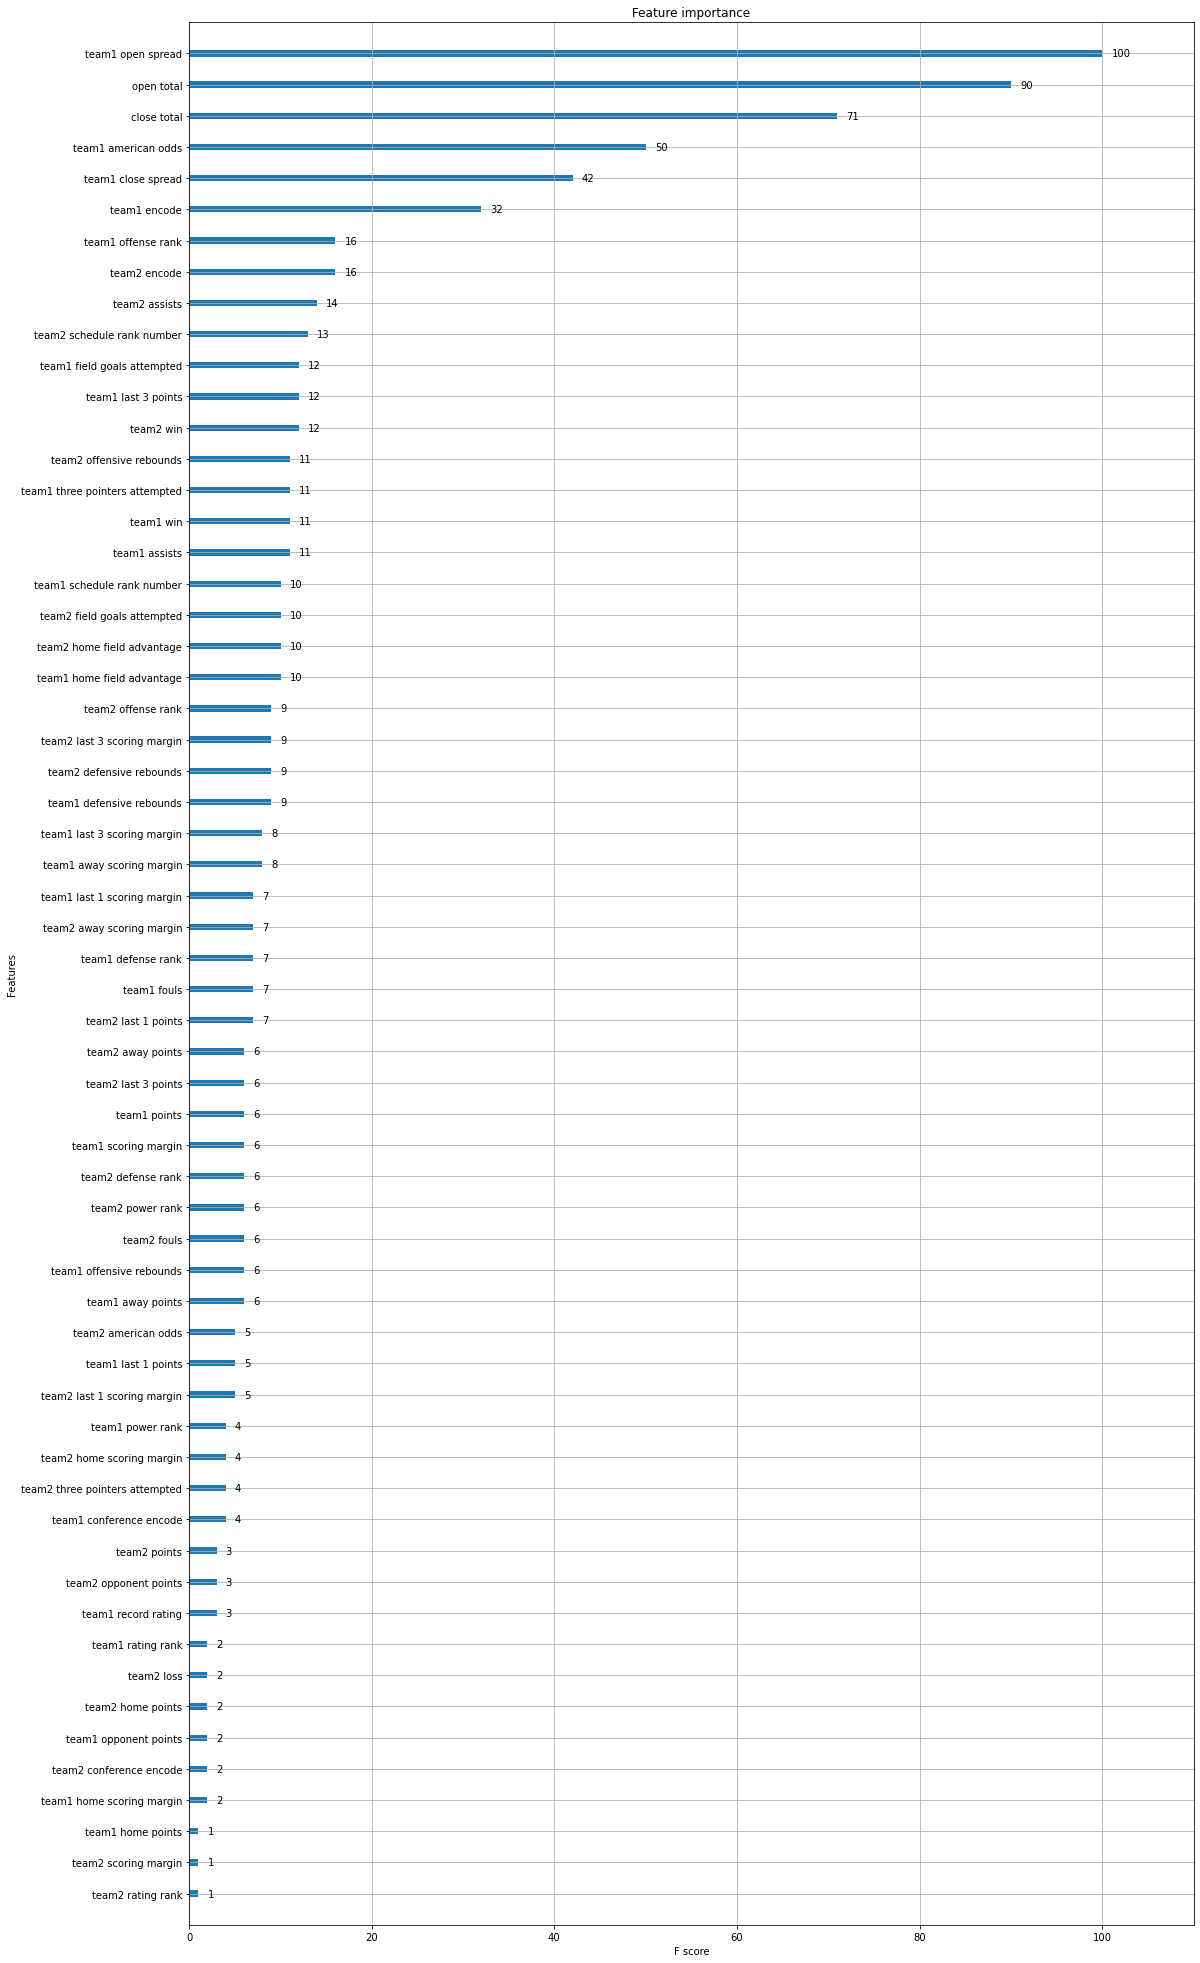

In [57]:
fig,ax = plt.subplots(1,1,figsize=(18,35))
xgb.plot_importance(bst,ax=ax)

### SHAP (shapley additive explanations)

In [88]:
treeExplainer = shap.TreeExplainer(XGBRegressor,model_output="raw",feature_perturbation="interventional",
    data=pd.DataFrame(xTest).head(100),algorithm="deep")

In [89]:
shapValues = treeExplainer.shap_values(pd.DataFrame(xTest).iloc[:327,:])
shapValues

array([[-0.16247024,  0.        ,  1.76541426, ...,  0.        ,
         0.        , -0.12475397],
       [-0.32073763,  0.        , -0.12996026, ...,  0.        ,
         0.        , -0.18361965],
       [-0.21700302,  0.        ,  5.00562763, ...,  0.        ,
         0.        , -0.19618703],
       ...,
       [-0.32073763,  0.        ,  1.28146664, ...,  0.        ,
         0.        , -0.18819076],
       [-0.34148455,  0.        , -3.3048528 , ...,  0.        ,
         0.        , -0.2985625 ],
       [-0.32073763,  0.        ,  1.11607351, ...,  0.        ,
         0.        , -0.18819076]])

In [90]:
shapValuesList = []
for i in shapValues:
    convListShapValues = i.tolist()
    shapValuesList.append(convListShapValues)
    
dfShapValues = pd.DataFrame(shapValuesList)
dfShapValues.head(55)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
0,-0.162470,0.0,1.765414,5.385671,1.256695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.109908,0.750711,-0.164509,0.775148,-0.807171,0.0,0.0,0.0,0.0,0.0,-1.794871,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.135569,0.0,0.276318,0.0,0.0,-0.052429,0.0,0.000143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.232506,2.806974,0.011026,0.025301,0.002008,0.0,0.0,-0.124754
1,-0.320738,0.0,-0.129960,6.404277,-0.642498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.125779,1.381488,0.578420,-2.322133,-0.612249,0.0,0.0,0.0,0.0,0.0,-0.398394,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.135569,0.0,-3.684274,0.0,0.0,0.435125,0.0,0.000984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069180,-0.858725,0.083455,0.057998,0.028682,0.0,0.0,-0.183620
2,-0.217003,0.0,5.005628,5.854305,1.422674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.053010,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185568,-6.649286,0.576008,0.819032,-0.666880,0.0,0.0,0.0,0.0,0.0,-1.805294,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.170485,0.0,0.276249,0.0,0.0,-0.050148,0.0,0.000143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012655,-1.369215,-0.056353,0.027394,-0.006811,0.0,0.0,-0.196187
3,-0.320738,0.0,1.323167,6.429019,1.634926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181310,1.380720,-0.166130,0.812164,-0.638123,0.0,0.0,0.0,0.0,0.0,-1.770536,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.135569,0.0,0.276318,0.0,0.0,-0.052429,0.0,0.000143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064923,-0.768164,0.066260,0.056503,0.028682,0.0,0.0,-0.186254
4,-0.320595,0.0,1.377087,6.392461,1.673135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.133407,1.395755,0.601168,0.810736,-0.638123,0.0,0.0,0.0,0.0,0.0,-1.770206,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.135569,0.0,0.276471,0.0,0.0,-0.050148,0.0,-0.000153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069180,-0.770959,0.072009,0.055264,-0.012853,0.0,0.0,-0.188191
5,-0.341485,0.0,-3.692000,-6.310252,3.676854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-0.022011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.040165,3.200778,0.338683,2.929505,-0.669440,0.0,0.0,0.0,0.0,0.0,0.223234,0.0,0.0,0.0,0.0,0.0,-0.000410,0.0,0.0,0.0,0.0,0.264000,0.0,0.109176,0.0,0.0,-0.075996,0.0,-0.000525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.131253,-1.194175,-0.079605,-0.348686,0.007212,0.0,0.0,-0.243814
6,-0.320738,0.0,0.510921,6.430787,-0.406434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.125779,1.395755,0.601168,-2.103811,-0.612249,0.0,0.0,0.0,0.0,0.0,-0.383169,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.135569,0.0,0.276318,0.0,0.0,-0.034554,0.0,0.000143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069180,-0.858725,0.083455,0.057358,0.002008,0.0,0.0,-0.188191
7,7.572211,0.0,0.602458,6.828500,1.780169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.100501,1.394779,-0.166130,0.810736,-0.666880,0.0,0.0,0.0,0.0,0.0,-1.770536,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.135569,0.0,0.276318,0.0,0.0,-0.052429,0.0,0.000929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.009550,-0.536399,0.719788,0.055264,0.002008,0.0,0.0,-0.188191
8,-0.320738,0.0,1.059084,6.890741,1.552199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0

In [91]:
shap.initjs()

In [92]:
shap.force_plot(treeExplainer.expected_value,shapValues[4],pd.DataFrame(xTest).iloc[5:6,])


In [93]:
shap.force_plot(treeExplainer.expected_value,shapValues[27],pd.DataFrame(xTest).iloc[28:29,])


In [94]:
shap.force_plot(treeExplainer.expected_value,shapValues[55],pd.DataFrame(xTest).iloc[56:57])


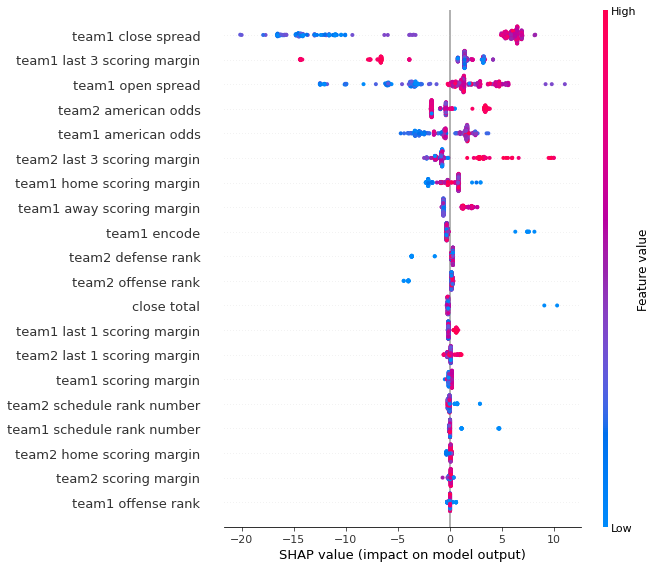

In [95]:
shap.summary_plot(shapValues,xTest[0:327])

### Compute SHAP values

In [96]:
explainer = shap.Explainer(XGBRegressor.predict,xTrain[:100])
explainShapValues = explainer(xTrain[:50])

Permutation explainer: 51it [00:11,  1.86s/it]                                                                         


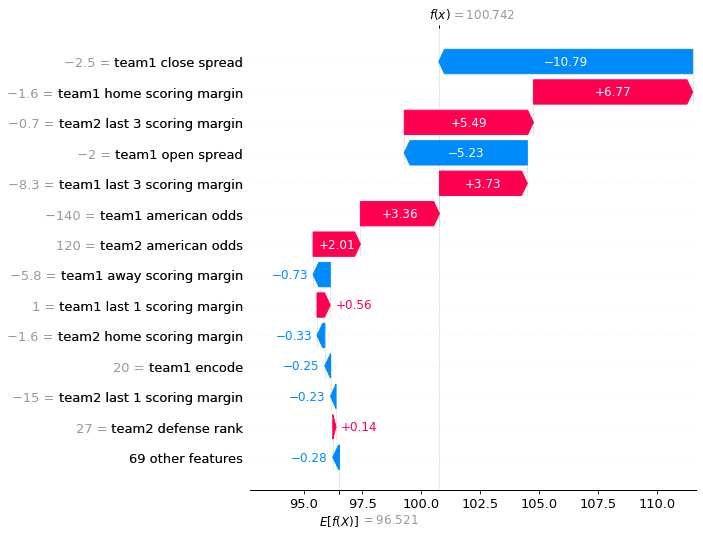

In [97]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(explainShapValues[13],max_display=14)

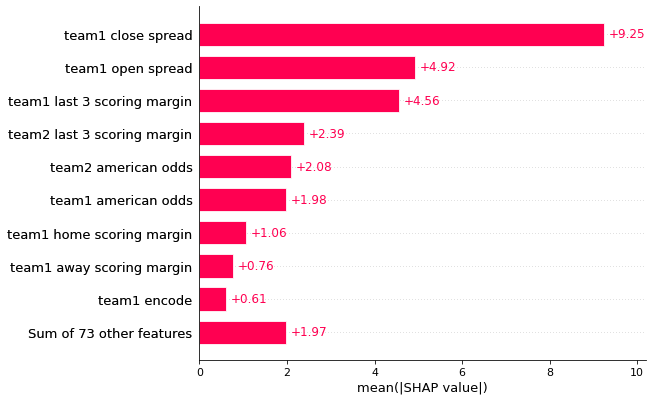

In [98]:
shap.plots.bar(explainShapValues)